# IMDB REVIEW CLASIFICATION

In [2]:
import tensorflow as tf

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.datasets import imdb

In [3]:
(train_data,train_labels),(test_data,test_labels)= imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 11s 1us/step


In [11]:
# word_index=imdb.get_word_index()
# reverse_word=dict([(value,key) for key,value in word_index.items()])
# decoded=" ".join([reverse_word.get(i-3,'?') for i in train_data[0]])
# decoded

In [13]:
import numpy as np
def vectorize(data,dimension=10000):
    result=np.zeros((len(data),dimension))
    for i,j in enumerate(data):
        result[i,j]=1
    return result

In [33]:
x_train=vectorize(train_data)
x_test=vectorize(test_data)

In [34]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [105]:
model = models.Sequential()


In [106]:
model.add(layers.Dense(16,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [107]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

In [108]:
partial_x_train=x_train[10000:]
x_val=x_train[:10000]
partial_y_train=y_train[10000:]
y_val=y_train[:10000]

In [109]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 3,
                    batch_size = 1,
                    validation_data = (x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/3
15000/15000 [==============================] - 38s 3ms/sample - loss: 0.3841 - accuracy: 0.8587 - val_loss: 0.3426 - val_accuracy: 0.8868
Epoch 2/3
15000/15000 [==============================] - 37s 2ms/sample - loss: 0.3376 - accuracy: 0.9033 - val_loss: 0.4089 - val_accuracy: 0.8889
Epoch 3/3
15000/15000 [==============================] - 38s 3ms/sample - loss: 0.3377 - accuracy: 0.9125 - val_loss: 0.4633 - val_accuracy: 0.8848


In [79]:
history_dic = history.history

In [83]:
history_dic.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [84]:
import matplotlib.pyplot as plt

In [110]:
loss_values = history_dic["loss"]
val_loss_values = history_dic["val_loss"]
epochs = range(1, len(history_dic["accuracy"])+1)

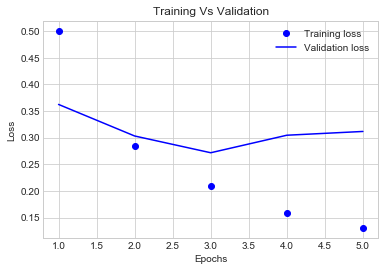

In [111]:
plt.plot(epochs,loss_values,'bo', label="Training loss")
plt.plot(epochs,val_loss_values,'b', label="Validation loss")
plt.title("Training Vs Validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [87]:
acc_values = history_dic["accuracy"]
val_acc_values = history_dic["val_accuracy"] 

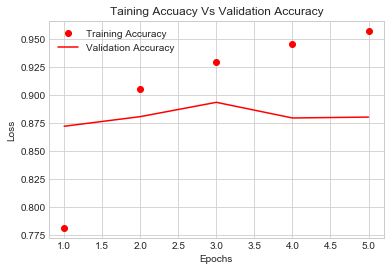

In [112]:
plt.style.use("seaborn-whitegrid")
plt.plot(epochs,acc_values,'ro',label="Training Accuracy")
plt.plot(epochs,val_acc_values,'r',label="Validation Accuracy")
plt.title("Taining Accuacy Vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [66]:
model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))



model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])


In [67]:
model.fit(x_train,
          y_train,
          epochs = 4,
          batch_size = 512
          )

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 3s 105us/sample - loss: 0.4463 - accuracy: 0.8318
Epoch 2/4
25000/25000 [==============================] - 2s 65us/sample - loss: 0.2595 - accuracy: 0.9098
Epoch 3/4
25000/25000 [==============================] - 2s 65us/sample - loss: 0.1995 - accuracy: 0.9301
Epoch 4/4
25000/25000 [==============================] - 1s 60us/sample - loss: 0.1689 - accuracy: 0.9406


In [68]:
results=model.evaluate(x_test,y_test);results

25000/25000 [==============================] - 2s 86us/sample - loss: 0.3029 - accuracy: 0.8808


[0.302936160326004, 0.88084]